In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle 
import os
import logging
from collections import Counter
import unicodedata

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hydra import initialize, compose
from greek_accentuation.syllabify import syllabify
from greek_accentuation.characters import base

from cgpos.data.make_dataset import load_perseus
from cgpos.utils.util import get_abs_dir, GREEK_CHARACTERS, GREEK_DIACRITICS, GREEK_PUNCTUATION

In [3]:
# Load hydra params
initialize("../conf", version_base=None)
config = compose(config_name='main')
# Init logger
logging.basicConfig(level=logging.INFO) 

In [4]:
# Load data
data = load_perseus(config)

In [5]:
# Normalize
greek_marks = set.union(GREEK_CHARACTERS, GREEK_DIACRITICS)
words_raw = [d['form'] for d in data if 'form' in d.keys()]
words_NFD = [unicodedata.normalize('NFD', word) for word in words_raw] # Normalize via unicode decomposition (ί becomes ι plus ́ )
words_greek = [word for word in words_NFD if all([ord(char) in greek_marks for char in word])] # Drop non-Greek characters
words_plain = [''.join([char for char in word if ord(char) not in GREEK_DIACRITICS]) for word in words_greek] # Drop diacritics

In [6]:
words_counter = Counter(words_greek)
words_counter.most_common(20)

[('καὶ', 15993),
 ('δ̓', 10778),
 ('δὲ', 9732),
 ('τε', 5140),
 ('μὲν', 4384),
 ('τῶν', 4029),
 ('ἐν', 3963),
 ('τὴν', 3494),
 ('τὸν', 3248),
 ('γὰρ', 3123),
 ('οὐ', 3117),
 ('τὸ', 2667),
 ('οἱ', 2656),
 ('τῆς', 2245),
 ('δέ', 2215),
 ('ὡς', 2203),
 ('ὁ', 2157),
 ('τοὺς', 2115),
 ('τοῦ', 2020),
 ('τ̓', 1934)]

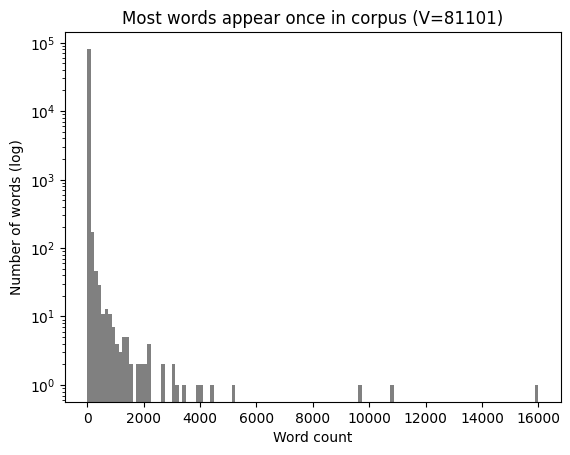

In [7]:
# Make hist
hist_values = np.fromiter(words_counter.values(), dtype=np.int32)
plt.hist(hist_values, bins=2**7, color='grey')
plt.yscale('log')
plt.title(f'Most words appear once in corpus (V={len(hist_values)})')
plt.xlabel('Word count')
plt.ylabel('Number of words (log)')
plt.show()

In [8]:
np.quantile(hist_values, np.arange(0, 1, 0.1))

array([1., 1., 1., 1., 1., 1., 1., 2., 3., 6.])